In [11]:
import pandas as pd

df = pd.read_csv('files/AverageTemperatureByYear.csv')

In [20]:
df.head(50)

,dt,Country,AverageTemperature
0,1987,Albania,12.996583
1,1987,Argentina,15.187500
2,1987,Armenia,8.996667
3,1987,Aruba,28.859417
4,1987,Australia,22.072417
5,1987,Austria,6.169500
6,1987,Azerbaijan,11.519750
7,1987,Bahamas,25.600917
8,1987,Bahrain,26.641750
9,1987,Barbados,27.335167


,index,dt,Country,AverageTemperature
0,0,1987,Albania,12.996583
1,1,1987,Argentina,15.187500
2,2,1987,Armenia,8.996667
3,3,1987,Aruba,28.859417
4,4,1987,Australia,22.072417
5,5,1987,Austria,6.169500
6,6,1987,Azerbaijan,11.519750
7,7,1987,Bahamas,25.600917
8,8,1987,Bahrain,26.641750
9,9,1987,Barbados,27.335167


In [12]:
avgTem = pd.DataFrame()

for name, group in df.groupby('Country'):
    if avgTem.empty:
        avgTem = group.set_index('dt')[['AverageTemperature']].rename(columns={'AverageTemperature':name})
    else:
        avgTem = avgTem.join(group.set_index('dt')[['AverageTemperature']].rename(columns={'AverageTemperature':name}))
        

In [13]:
avgTem.head()

,Albania,Argentina,Armenia,Aruba,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Barbados,...,Switzerland,Thailand,Turkey,Turkmenistan,Ukraine,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan
dt,,,,,,,,,,,,,,,,,,,,,
1987,12.996583,15.187500,8.996667,28.859417,22.072417,6.169500,11.519750,25.600917,26.641750,27.335167,...,7.137083,26.651167,11.613833,15.438750,6.182500,28.094333,8.330250,9.628167,17.658667,12.846333
1988,13.044083,14.836333,8.626083,28.349917,22.630083,7.082167,11.590250,25.371833,26.628000,27.013917,...,7.924583,26.399750,11.621917,15.954833,7.781333,28.140250,8.973083,9.275333,17.113500,13.595583
1989,12.803833,15.543000,9.785833,28.134583,21.862833,7.372417,12.445083,25.651667,26.022500,26.752167,...,8.135917,26.320917,12.175500,15.663500,9.523750,27.585250,9.587500,8.873083,18.100500,12.965500
1990,13.468667,15.155083,9.258083,28.243333,22.355750,7.344000,11.992000,25.992333,26.344583,26.943167,...,8.255583,26.590667,12.032500,15.926417,9.400833,28.260083,9.674583,9.521583,17.703583,13.463083
1991,12.338833,15.097583,9.372583,28.343083,22.487417,6.357917,11.956000,25.926750,25.811917,26.893167,...,7.405000,26.653333,11.751083,15.521083,8.300167,27.697083,8.828333,9.493667,17.973917,13.031083


In [15]:
aTcorr = avgTem.corr()

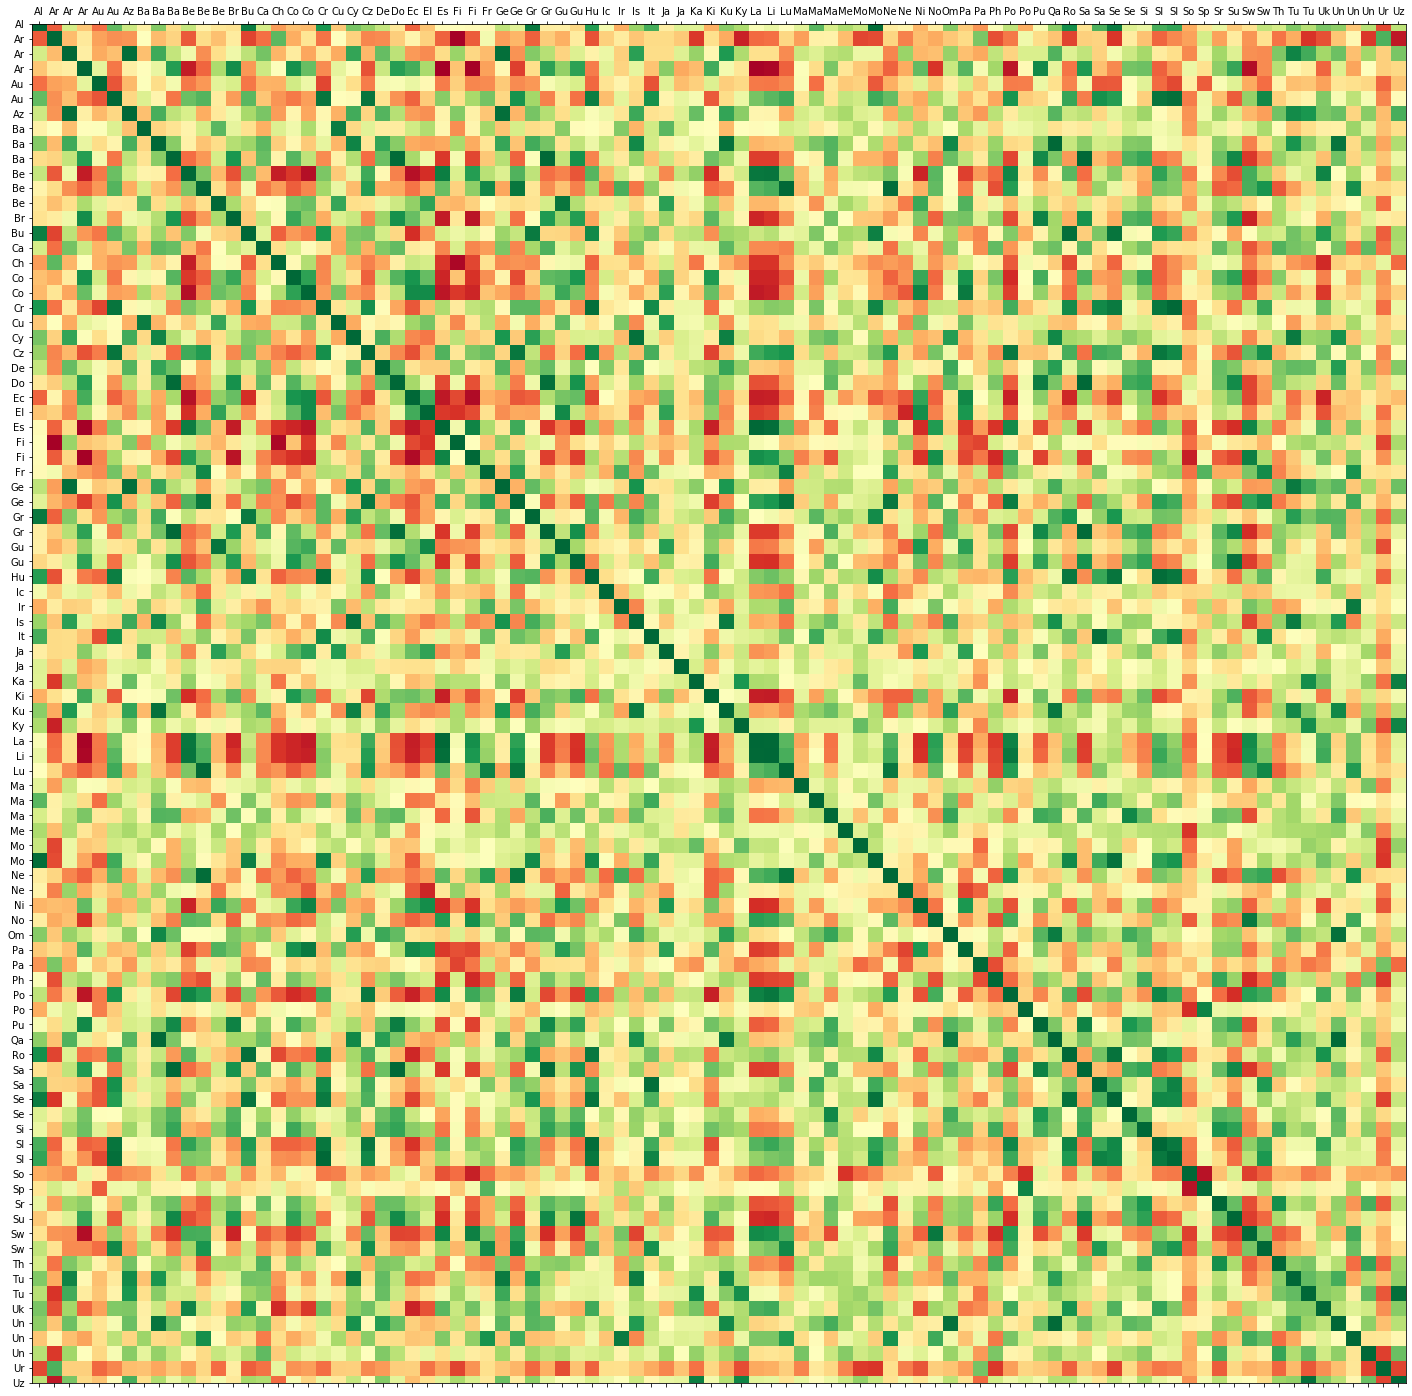

In [21]:
import matplotlib.pyplot as plt
import numpy as np

labels = [c[:2] for c in aTcorr.columns]

fig = plt.figure(figsize=(25, 25))
ax = fig.add_subplot(111)

ax.matshow(aTcorr, cmap=plt.cm.RdYlGn)

ax.set_yticklabels(labels)
ax.set_xticklabels(labels)
ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))

plt.show()
